In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path

In [2]:
#For different groups change the text between /Processed Data and /ACC in MainPath
#Different Groups -  ZU_2021_1, ZU_2021_2, NQ_2021_1 and RW_2021_1

MainPath = '/media/amlan/Data/Thesis Data/Processed Data/'
Groups = ['ZU_2021_2','ZU_2021_1','NQ_2021_1','RW_2021_1']

paths = []

for i in Groups:
    files = os.listdir(MainPath + i + '/ACC')
    for j in files:
        paths.append(j)
    
paths = [i for i in paths if 'DS_Store' not in i]
paths = [i for i in paths if '.~lock' not in i]

In [3]:
df = pd.DataFrame(columns=['Timestamp','X_Mean','Y_Mean','Z_Mean','X_Std','Y_Std','Z_Std','X_Max','Y_Max','Z_Max','X_Min','Y_Min','Z_Min','VeDBA'])


for j in Groups:
    paths = os.listdir(MainPath + j + '/ACC')
    paths = [i for i in paths if 'DS_Store' not in i]
    paths = [i for i in paths if '.~lock' not in i]    
    for k in paths:
        File = j + '/ACC/' + k
        Data = pd.read_csv(MainPath + File, index_col=0) 
        df = pd.concat([df, Data], ignore_index=True, sort=False)
    

In [18]:
df.drop(['Timestamp'],axis=1,inplace=True)
print(df.head(5))

     X_Mean    Y_Mean    Z_Mean     X_Std     Y_Std     Z_Std   X_Max   Y_Max  \
0  0.958222 -0.154066  0.069530  0.009481  0.009929  0.010106  0.9797 -0.1275   
1  0.960134 -0.155024  0.070502  0.008845  0.008511  0.008922  0.9822 -0.1407   
2  0.960314 -0.154114  0.072230  0.009489  0.010818  0.009856  0.9691 -0.1250   
3  0.958522 -0.155986  0.069218  0.008615  0.008141  0.008275  0.9816 -0.1407   
4  0.957258 -0.152798  0.066660  0.010393  0.007269  0.009439  0.9841 -0.1407   

    Z_Max   X_Min   Y_Min   Z_Min     VeDBA  
0  0.0938  0.9384 -0.1819  0.0478  0.009342  
1  0.0919  0.9378 -0.1716  0.0510  0.008964  
2  0.0938  0.9378 -0.1719  0.0469  0.008860  
3  0.0932  0.9378 -0.1719  0.0550  0.008693  
4  0.0875  0.9378 -0.1713  0.0469  0.010366  


In [19]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def KM(k, X):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    return km

def get_aic(k, X):
    gm = GaussianMixture(n_components=k, init_params='kmeans')
    gm.fit(X)
    return gm.aic(X)

def get_score(k, X):
    aic = get_aic(k, X)
    return k, aic

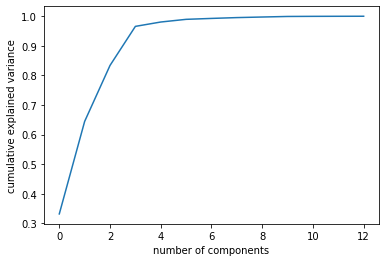

In [20]:
pca = PCA().fit(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [4]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df.sample(frac=0.50))

NameError: name 'PCA' is not defined

In [ ]:
from joblib import delayed,Parallel

number_of_cpu = joblib.cpu_count()

delayed_funcs = [delayed(get_score)(i, df_pca) for i in range(2,10)]
parallel_pool = Parallel(n_jobs=int(number_of_cpu//1.5))

parallel_pool(delayed_funcs)

In [1]:
number_of_cpu//1.5, len(range(2,10))

NameError: name 'number_of_cpu' is not defined

(1793166, 3)

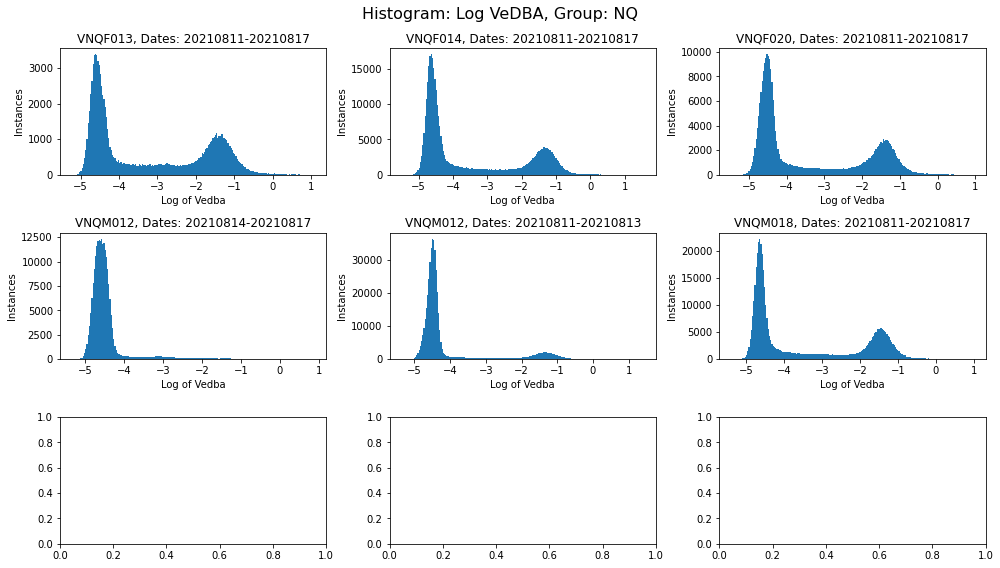

In [9]:
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(14,8))
Axes = axs.reshape(-1)


for y in paths:
    #File = 'NQ_VNQF014_SHLT_Axy_002_20210811-20210817/NQ_VNQF014_SHLT_Axy_002_20210811-20210817.csv'
    File = '/' + str(y)
    Data = pd.read_csv(MainPath + File,usecols = ['VeDBA']) 

    fig_det = y.split('_')

    fig.suptitle('Histogram: Log VeDBA, Group: '+str(fig_det[0]), fontsize=16)

    i = paths.index(y)

    Axes[i].hist(np.log(Data+.000001),bins=200)
    #Axes[i].set_xlim([-8, 2])
    #Axes[i].set_ylim([0, ])
    Axes[i].set_title( str(fig_det[1]) + ', Dates: ' + str(fig_det[-1].split('.')[0]))
    Axes[i].set_xlabel('Log of Vedba')
    Axes[i].set_ylabel('Instances')
    
    
    
fig.tight_layout()
plt.show()